In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
plt.style.use('default')

swin_s_nc512_e300_crop512_b8r4:	 mae:5.098684210526316 mse:88.32872588116209
swin_t_nc512_e300_crop512_b8r4:	 mae:5.0855263157894735 mse:44.643139096853986
swin_t_nc512_e300_crop512_b8r4:	 mae:4.088815789473684 mse:43.901579518401455
swin_s_nc512_e300_crop512_b8r4:	 mae:3.8190789473684212 mse:44.238550406916175


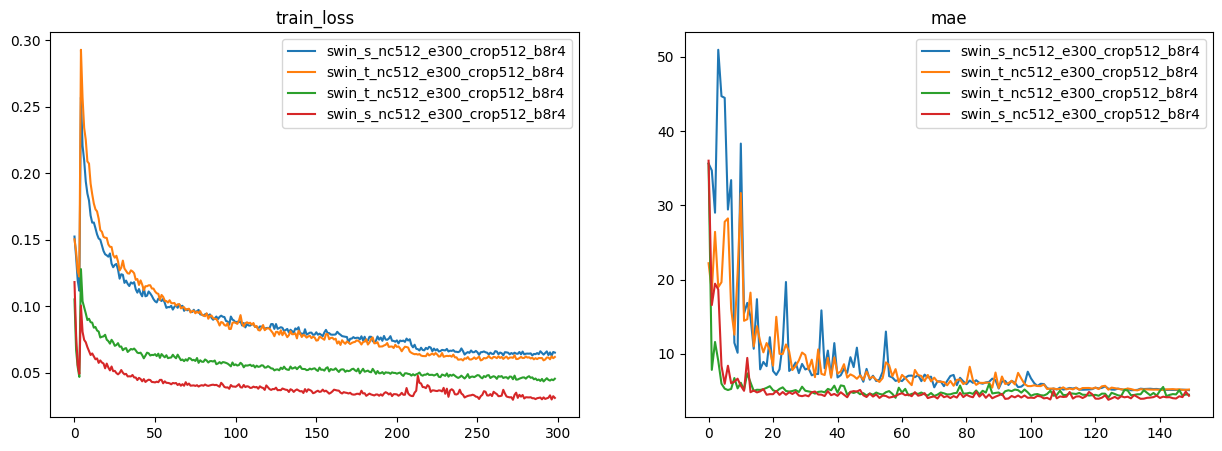

In [4]:
log_path = 'outputs/RTC/vgg16_bn_pet_e1000_crop512_b8r2_HW2XY/run_log.txt'
log_path = 'outputs/RTC/vgg16_bn_pet_e1000_crop512_b8r4/run_log.txt'
log_path = '../outputs/RTC/swin_b_e300_crop512_b8r4/run_log.txt'
log_path = '/home/slcao/projects/PET/outputs/RTC/swin_s_nc512_e300_crop512_b8r4/run_log.txt'
# log_path = '/home/slcao/projects/PET/outputs/RTC/swin_t_nc512_e300_crop512_b8r4/run_log.txt'
# log_path = '/home/slcao/projects/PET/outputs/RTC/swin_b_nc512_e300_crop512_b8r4/run_log.txt'
# log_path = '/home/slcao/projects/PET/outputs/RTC/agent_swin_b_nc512_e300_crop512_b8r4/run_log.txt'
log_paths = [
    # '/home/slcao/projects/PET/outputs/RTC/agent_swin_b_nc512_e300_crop512_b8r4/run_log.txt',
    # '/home/slcao/projects/PET/outputs/RTC/agent_swin_s_nc512_e300_crop512_b8r4/run_log.txt',
    # '/home/slcao/projects/PET/outputs/RTC/agent_swin_t_nc512_e300_crop512_b8r4_times2/run_log.txt',
    # '/home/slcao/projects/PET/outputs/RTC/swin_b_nc512_e300_crop512_b8r4/run_log.txt',
    '/home/slcao/projects/PET/outputs/RTC/swin_s_nc512_e300_crop512_b8r4/run_log.txt',
    '/home/slcao/projects/PET/outputs/RTC/swin_t_nc512_e300_crop512_b8r4/run_log.txt',
    '/home/slcao/projects/PET/outputs/RTC/bad_data/swin_t_nc512_e300_crop512_b8r4/run_log.txt',
    '/home/slcao/projects/PET/outputs/RTC/bad_data/swin_s_nc512_e300_crop512_b8r4/run_log.txt',
    
]


def get_log_data(log_path, name='train_loss'):
    p = re.compile(r'[{](.*?)[}]', re.S)
    with open(log_path, 'r') as f:
        log = f.read().split('\n')
        train_msg = [re.findall(p, line)[0].split(' ') for line in log if 'train_lr' in line]
        train_log = []
        for line in train_msg:
            line = [i[1:-2] if ':' in i else float(i[:-1]) for i in line]
            train_log.append(line)
        val_log = [line for line in log if 'mse' in line]

    # print(train_log[0])
    loss_show = name
    loss = [i[i.index(loss_show)+1] for i in train_log][1:]

    # print(val_log[0])
    mae = [float(line.split(' ')[1][4:-1]) for line in val_log]
    mse = [float(line.split(' ')[2][4:-1]) for line in val_log]

    return loss, mae, mse

loss_show = 'train_loss'
loss_all, mae_all, mse_all = [], [], []
for path in log_paths:
    loss, mae, mse = get_log_data(path, loss_show)
    loss_all.append(loss)
    mae_all.append(mae)
    mse_all.append(mse)

plt.figure(figsize=(15,5))
plt.subplot(121)
for loss in loss_all:
    plt.plot(loss)
plt.title(loss_show)
plt.legend([i.split('/')[-2] for i in log_paths])
plt.subplot(122)
for m in mae_all:
    plt.plot(m)
plt.title('mae')
plt.legend([i.split('/')[-2] for i in log_paths])

for i in [f"{p.split('/')[-2]}:\t mae:{min(i)} mse:{max(j)}" for i,j,p in zip(mae_all, mse_all, log_paths)]:
    print(i)

In [1]:
import torch
import torch.nn.functional as F

input_tensor = torch.randn(8, 1, 8, 4)
print("Input Tensor Shape:", input_tensor.shape)
output_tensor = F.interpolate(input_tensor, size=(32, 32), mode='nearest')
print("Output Tensor Shape:", output_tensor.shape)


print("Input Tensor (First Sample):")
print(input_tensor[0, 0, :2, :2])

print("\nOutput Tensor (First Sample):")
print(output_tensor[0, 0, :8, :8])

Input Tensor Shape: torch.Size([8, 1, 8, 4])
Output Tensor Shape: torch.Size([8, 1, 32, 32])
Input Tensor (First Sample):
tensor([[ 0.6407, -0.0176],
        [-0.5935, -1.9792]])

Output Tensor (First Sample):
tensor([[ 0.6407,  0.6407,  0.6407,  0.6407,  0.6407,  0.6407,  0.6407,  0.6407],
        [ 0.6407,  0.6407,  0.6407,  0.6407,  0.6407,  0.6407,  0.6407,  0.6407],
        [ 0.6407,  0.6407,  0.6407,  0.6407,  0.6407,  0.6407,  0.6407,  0.6407],
        [ 0.6407,  0.6407,  0.6407,  0.6407,  0.6407,  0.6407,  0.6407,  0.6407],
        [-0.5935, -0.5935, -0.5935, -0.5935, -0.5935, -0.5935, -0.5935, -0.5935],
        [-0.5935, -0.5935, -0.5935, -0.5935, -0.5935, -0.5935, -0.5935, -0.5935],
        [-0.5935, -0.5935, -0.5935, -0.5935, -0.5935, -0.5935, -0.5935, -0.5935],
        [-0.5935, -0.5935, -0.5935, -0.5935, -0.5935, -0.5935, -0.5935, -0.5935]])


300


/tmp/ipykernel_2810958/3845460777.py:65: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


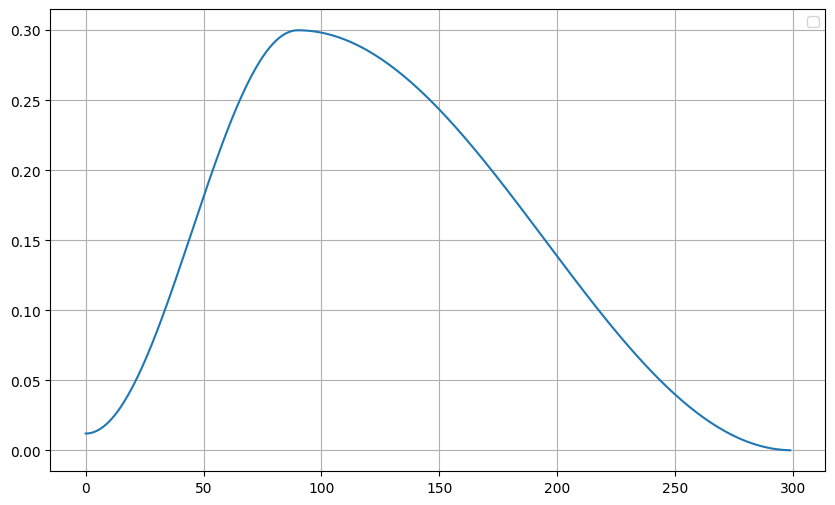

In [5]:
import math
import torch
from torch.optim import Optimizer
import matplotlib.pyplot as plt

class OneCycleLR:
    def __init__(self, optimizer, max_lr, total_steps, pct_start=0.3, anneal_strategy='cos', div_factor=25.0, final_div_factor=1e4):
        self.optimizer = optimizer
        self.max_lr = max_lr
        self.total_steps = total_steps
        self.pct_start = pct_start
        self.anneal_strategy = anneal_strategy
        self.div_factor = div_factor
        self.final_div_factor = final_div_factor

        self.step_num = 0
        self.initial_lr = max_lr / div_factor
        self.final_lr = max_lr / final_div_factor
        self.anneal_func = self._annealing_cos if anneal_strategy == 'cos' else self._annealing_linear

        self._schedule = self._create_schedule()

    def _annealing_cos(self, start, end, pct):
        cos_out = math.cos(math.pi * pct) + 1
        return end + (start - end) / 2.0 * cos_out

    def _annealing_linear(self, start, end, pct):
        return (end - start) * pct + start

    def _create_schedule(self):
        schedule = []
        for step in range(self.total_steps):
            if step < self.total_steps * self.pct_start:
                pct = step / (self.total_steps * self.pct_start)
                lr = self.anneal_func(self.initial_lr, self.max_lr, pct)
            else:
                pct = (step - self.total_steps * self.pct_start) / (self.total_steps * (1 - self.pct_start))
                lr = self.anneal_func(self.max_lr, self.final_lr, pct)
            schedule.append(lr)
        print(len(schedule))
        return schedule

    def step(self):
        lr = self._schedule[self.step_num]
        for param_group in self.optimizer.param_groups:
            param_group['lr'] = lr
        self.step_num += 1
        return lr

# 示例用法
model = torch.nn.Linear(10, 2)  # 示例模型
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
total_steps = 300
scheduler = OneCycleLR(optimizer, max_lr=0.3, total_steps=total_steps)

# 记录学习率
lrs = []
for _ in range(total_steps):
    lr = scheduler.step()
    lrs.append(lr)

# 绘制学习率曲线
plt.figure(figsize=(10, 6))
plt.plot(lrs)
plt.legend()
plt.grid(True)
plt.show()